In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read file and view sample data
ifile = pd.read_csv('C:/user/Medicare/InpatientCharges_FY2011.csv')
ifile.head()

,DRGDefinition,ProviderId,ProviderName,ProviderStreetAddress,ProviderCity,ProviderState,ProviderZipCode,HospitalReferralRegionDescription,TotalDischarges,AverageCoveredCharges,AverageTotalPayments,AverageMedicarePayments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [3]:
#get data column names and type
ifile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRGDefinition                        163065 non-null object
ProviderId                           163065 non-null int64
ProviderName                         163065 non-null object
ProviderStreetAddress                163065 non-null object
ProviderCity                         163065 non-null object
ProviderState                        163065 non-null object
ProviderZipCode                      163065 non-null int64
HospitalReferralRegionDescription    163065 non-null object
TotalDischarges                      163065 non-null int64
AverageCoveredCharges                163065 non-null float64
AverageTotalPayments                 163065 non-null float64
AverageMedicarePayments              163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ MB


In [4]:
#get data insight
ifile.describe()

,ProviderId,ProviderZipCode,TotalDischarges,AverageCoveredCharges,AverageTotalPayments,AverageMedicarePayments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


In [5]:
# get the treatment and provider for the max AverageTotalPayments of 156158.18 and max TotalDischarges of 3383
cond1 = ifile.TotalDischarges.values == 3383
cond2 = ifile.AverageTotalPayments.values == 156158.18

ifile.loc[cond1 | cond2, ['DRGDefinition','ProviderName', 'ProviderCity', 'ProviderState', 
                          'AverageTotalPayments', 'TotalDischarges']].reset_index(drop=True)

,DRGDefinition,ProviderName,ProviderCity,ProviderState,AverageTotalPayments,TotalDischarges
0,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,STANFORD HOSPITAL,STANFORD,CA,156158.18,11
1,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,HOSPITAL FOR SPECIAL SURGERY,NEW YORK,NY,19023.70,3383


In [6]:
# Top 5 state with highest Average expense
#Create function to calculate average and apply it on dataframe
def func(df, col):
    df[col] = round((df['AverageTotalPayments'] * df['TotalDischarges']).sum() / df['TotalDischarges'].sum(), 2)
    return df

avgExpByState = ifile[['ProviderState', 'AverageTotalPayments', 'TotalDischarges']]. \
                    groupby('ProviderState').apply(func, 'AvgByState'). \
                    drop(['AverageTotalPayments', 'TotalDischarges'], axis=1). \
                    drop_duplicates(). \
                    sort_values('AvgByState', ascending=False).reset_index(drop=True)
avgExpByState.head(5)                

,ProviderState,AvgByState
0,AK,14677.61
1,HI,12724.14
2,CA,12342.05
3,DC,12340.21
4,WY,12088.68


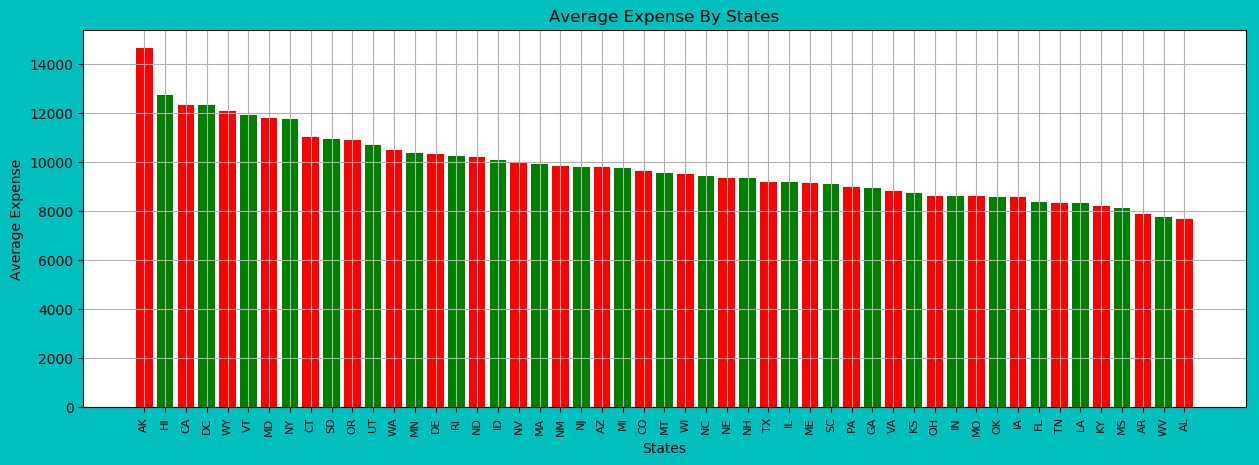

In [7]:
# Plot average expense by states
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'c'
plt.xticks(rotation='vertical', fontsize=8)
plt.grid()
plt.xlabel('States')
plt.ylabel('Average Expense')
plt.title('Average Expense By States')
plt.bar(avgExpByState.ProviderState, avgExpByState.AvgByState, color=['r', 'g'])
plt.show()

In [8]:
# Top 5 state with lowest Average expense
avgExpByState.tail(5)                

,ProviderState,AvgByState
46,KY,8225.17
47,MS,8115.77
48,AR,7865.41
49,WV,7761.77
50,AL,7698.64


In [9]:
# Top 5 providers with highest Average cost
# use the average function defined in the previous step to calculate by Provider
avgExpByProvider = ifile[['ProviderId','ProviderName','ProviderCity','ProviderState', 'AverageTotalPayments', 'TotalDischarges']]. \
                    groupby('ProviderId').apply(func, 'AvgByProvider'). \
                    drop(['AverageTotalPayments', 'TotalDischarges'], axis=1)    . \
                    drop_duplicates(). \
                    sort_values('AvgByProvider', ascending=False).reset_index(drop=True)
avgExpByProvider.head(5)                

,ProviderId,ProviderName,ProviderCity,ProviderState,AvgByProvider
0,490142,UVA HEALTH SCIENCES CENTER,CHARLOTTESVILLE,VA,50552.61
1,450880,BAYLOR SURGICAL HOSPITAL AT FORT WORTH,FORT WORTH,TX,38418.53
2,60096,VAIL VALLEY MEDICAL CENTER,VAIL,CO,35063.09
3,50528,MEMORIAL HOSPITAL LOS BANOS,LOS BANOS,CA,25181.73
4,530015,ST JOHNS MEDICAL CENTER,JACKSON,WY,23968.12


In [10]:
# Top 5 providers with Lowest Average cost
avgExpByProvider.tail(5).set_index('ProviderId')

,ProviderName,ProviderCity,ProviderState,AvgByProvider
ProviderId,,,,
230279,BRIGHTON HOSPITAL,BRIGHTON,MI,3736.00
340168,WILMINGTON TREATMENT CENTER,WILMINGTON,NC,3639.47
450813,COMMUNITY GENERAL HOSPITAL,DILLEY,TX,3623.44
250151,ALLIANCE HEALTH CENTER,MERIDIAN,MS,3510.75
110209,TURNING POINT HOSPITAL,MOULTRIE,GA,3291.31


In [11]:
# Top 5 states with highest Patient Expenditure percentage

# Calculate total patient expenditure by state
def patTotal(df):
    df['PatTotal'] = ((df['AverageTotalPayments'] - df['AverageMedicarePayments']) * df['TotalDischarges']).sum()
    return df
patTotalByState = ifile[['ProviderState', 'AverageTotalPayments', 'AverageMedicarePayments','TotalDischarges']]. \
                      groupby('ProviderState').apply(patTotal). \
                      drop(['TotalDischarges','AverageTotalPayments', 'AverageMedicarePayments'], axis=1).drop_duplicates(). \
                        sort_values('PatTotal', ascending=False).reset_index(drop=True)
patTotalAmt = patTotalByState['PatTotal'].sum()

# Calculate patient Expenditure percentage
def patPercent(df):
    df['patientPercent'] = df['PatTotal']*100/patTotalAmt
    return df
patTotalByState.groupby('ProviderState').apply(patPercent).head(5)

,ProviderState,PatTotal,patientPercent
0,TX,6.371410e+08,7.294054
1,FL,6.345237e+08,7.264091
2,NY,5.506189e+08,6.303541
3,CA,5.475402e+08,6.268296
4,IL,5.069130e+08,5.803191


In [12]:
# Top 5 Treatments with highest patient count

def splitDRG(df):
# function to remove various condition from DRG and combine DRG count for same DRG
    
    DRGSplit = df['DRGDefinition'].split() #Split values
    DRGCombine = ''
    
    for i in DRGSplit[2:]:                                #skip first two elements which are number and dash
        if i not in ['W/O', 'CC/MCC', 'W', 'CC', 'MCC']:  #ignore the condition elements
            DRGCombine += i + ' '                         
    df['DRG'] = DRGCombine                                #Create new DRG column without conditions
    return df

ifile_sum = ifile[['DRGDefinition', 'TotalDischarges']].groupby('DRGDefinition').sum().reset_index()

#Display top 5 most common treatments with highest Total Discharges
ifile_sum.apply(splitDRG, axis=1).drop('DRGDefinition', axis=1). \
            groupby('DRG').sum(). \
            sort_values('TotalDischarges', ascending=False).head(5)

,TotalDischarges
DRG,
HEART FAILURE & SHOCK,496854
SEPTICEMIA OR SEVERE SEPSIS MV 96+ HOURS,454126
MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY,445921
CHRONIC OBSTRUCTIVE PULMONARY DISEASE,412958
SIMPLE PNEUMONIA & PLEURISY,406252


In [13]:
# Top 5 costliest treatments
# use function 'func' created earlier to calculate average price by each Diagnostic along with conditions
avgExpByDIAG = ifile[['DRGDefinition', 'AverageTotalPayments', 'TotalDischarges']]. \
                    groupby('DRGDefinition').apply(func, 'AvgByDIAG'). \
                    drop(['AverageTotalPayments', 'TotalDischarges'], axis=1)    . \
                    drop_duplicates(). \
                    sort_values('AvgByDIAG', ascending=False).reset_index(drop=True)

# Use function created earlier to remove conditions from DIAG name and calculate mean value by DIAG
avgExpByDIAG.apply(splitDRG, axis=1).drop('DRGDefinition', axis=1). \
            groupby('DRG').mean(). \
            sort_values('AvgByDIAG', ascending=False).head(5)

,AvgByDIAG
DRG,
INFECTIOUS & PARASITIC DISEASES O.R. PROCEDURE,41267.55
RESPIRATORY SYSTEM DIAGNOSIS VENTILATOR SUPPORT 96+ HOURS,39075.22
MAJOR SMALL & LARGE BOWEL PROCEDURES,28251.00
SPINAL FUSION EXCEPT CERVICAL,27347.60
PERC CARDIOVASC PROC DRUG-ELUTING STENT OR 4+ VESSELS/STENTS,23336.48


In [14]:
# Top 5 costliest treatments
# use function created earlier to calculate average price by each Diagnostic along with conditions
avgExpByDIAG = ifile[['DRGDefinition', 'AverageTotalPayments']].groupby('DRGDefinition').mean().drop_duplicates(). \
                    reset_index()

# Use function created earlier to remove conditions from DIAG name and calculate mean value by DIAG
avgExpByDIAG.apply(splitDRG, axis=1).drop('DRGDefinition', axis=1). \
            groupby('DRG').mean(). \
            sort_values('AverageTotalPayments', ascending=False).head(5)
#avgExpByDIAG.head()

,AverageTotalPayments
DRG,
INFECTIOUS & PARASITIC DISEASES O.R. PROCEDURE,40315.961432
RESPIRATORY SYSTEM DIAGNOSIS VENTILATOR SUPPORT 96+ HOURS,38588.920997
MAJOR SMALL & LARGE BOWEL PROCEDURES,27846.131286
SPINAL FUSION EXCEPT CERVICAL,27778.671119
PERC CARDIOVASC PROC DRUG-ELUTING STENT OR 4+ VESSELS/STENTS,23326.339019
